## Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Load Dataframe

In [2]:
df_scaled = pd.read_csv('../data/02_processed/df_scaled.csv', encoding='latin-1')
df_sellers = pd.read_csv('../data/02_processed/df_sellers.csv', encoding='latin-1')

In [3]:
df_scaled.describe()

,stock_total,precio_promedio,logistic_type_unique,pct_new,pct_refurbished,categorias_unicas
count,4.658600e+04,46586.000000,4.658600e+04,4.658600e+04,4.658600e+04,4.658600e+04
mean,1.952292e-17,-0.000032,7.992195e-17,-2.852176e-17,7.206702e-17,-4.270639e-17
std,1.000011e+00,0.997346,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-8.287365e-02,-0.006052,-3.557932e-01,-2.075784e+00,-7.918002e-02,-3.806471e-01
25%,-8.273788e-02,-0.006038,-3.557932e-01,4.911550e-01,-7.918002e-02,-3.806471e-01
50%,-8.192331e-02,-0.006023,-3.557932e-01,4.911550e-01,-7.918002e-02,-3.806471e-01
75%,-7.588186e-02,-0.005974,-3.557932e-01,4.911550e-01,-7.918002e-02,1.639394e-01
max,7.230359e+01,213.425388,8.060753e+00,4.911550e-01,1.420652e+01,2.521492e+01


## Búsqueda del K Óptimo

In [4]:
inertia = []
range_of_k = range(1, 31)  # Se probarán de 1 a 20 clústeres
for k in range_of_k:
    # Crear y entrenar el modelo K-Means para el valor actual de k
    kmeans_model = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans_model.fit(df_scaled)
    
    # Añadir la inercia del modelo a la lista
    inertia.append(kmeans_model.inertia_)
    print(f"Inercia para k={k}: {kmeans_model.inertia_:.2f}")

Inercia para k=1: 279268.01
Inercia para k=2: 225431.87
Inercia para k=3: 179876.59
Inercia para k=4: 135630.48
Inercia para k=5: 92103.67
Inercia para k=6: 62119.49
Inercia para k=7: 44602.25
Inercia para k=8: 37374.57
Inercia para k=9: 30842.36
Inercia para k=10: 27190.13
Inercia para k=11: 23465.01
Inercia para k=12: 21281.22
Inercia para k=13: 19207.25
Inercia para k=14: 17138.30
Inercia para k=15: 15564.42
Inercia para k=16: 14234.30
Inercia para k=17: 13095.96
Inercia para k=18: 12085.21
Inercia para k=19: 10988.46
Inercia para k=20: 10229.20
Inercia para k=21: 9590.05
Inercia para k=22: 8881.82
Inercia para k=23: 8373.71
Inercia para k=24: 7823.60
Inercia para k=25: 7409.40
Inercia para k=26: 7120.61
Inercia para k=27: 6842.14
Inercia para k=28: 6561.88
Inercia para k=29: 6184.65
Inercia para k=30: 5973.86


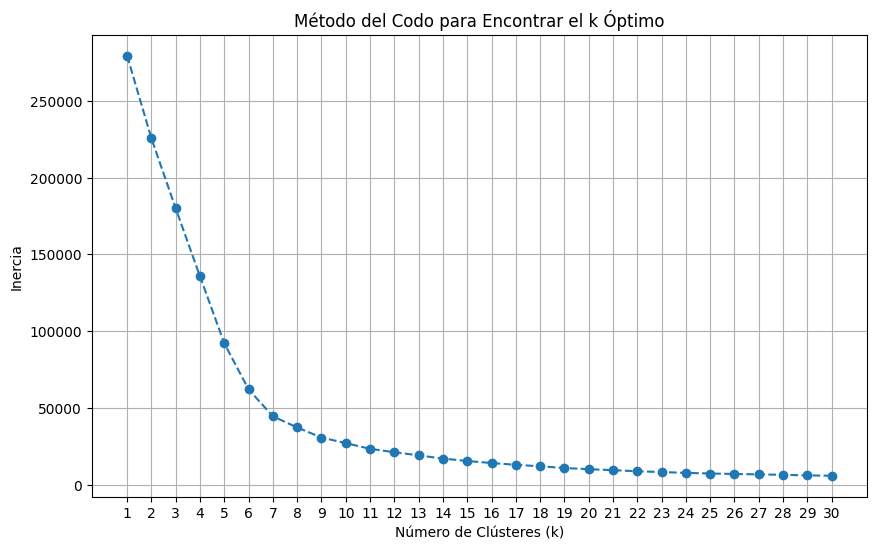

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(range_of_k, inertia, marker='o', linestyle='--')

plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar el k Óptimo')
plt.xticks(range_of_k)
plt.grid(True)

plt.show()

k = 7

## Modelo KMeans

In [ ]:
optimal_k = 7
model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
model.fit(df_scaled)

,n_clusters,7
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
cluster_labels = model.labels_

In [8]:
df_sellers['cluster'] = cluster_labels
df_sellers.head()

,seller_nickname,stock_total,precio_promedio,logistic_type_unique,pct_new,pct_refurbished,categorias_unicas,price_capped,stock_capped,price_log,stock_log,cluster
0,000631669c,10,799.0,1,1.0,0.0,1,799.0,10.0,6.684612,2.397895,0
1,0007153bca,55,399.0,1,1.0,0.0,1,399.0,55.0,5.991465,4.025352,0
2,000bee3c3b,0,382.5,1,1.0,0.0,1,382.5,0.0,5.949340,0.000000,0
3,000df2bd02,5,1550.0,1,0.0,0.0,1,1550.0,5.0,7.346655,1.791759,2
4,000e27cea2,6,457.5,2,1.0,0.0,2,457.5,6.0,6.127960,1.945910,1


## Evaluación

In [9]:
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"El Silhouette Score promedio es: {silhouette_avg:.4f}")

El Silhouette Score promedio es: 0.8061


Un score por encima de 0.5 se considera bueno. Un score positivo indica que la clusterización es razonable.

Por lo que podemos considerar que Un Silhouette Score de **0.8061** es bueno. Nos indica que los 7 clústeres que has creado son densos, coherentes y, lo más importante, están muy bien separados entre sí. En promedio, cada vendedor está mucho más cerca de los miembros de su propio clúster que de los miembros de cualquier otro.

In [10]:
cluster_profiles = df_sellers.groupby('cluster').mean(numeric_only=True)
cluster_profiles['count'] = df_sellers['cluster'].value_counts()
cluster_profiles

,stock_total,precio_promedio,logistic_type_unique,pct_new,pct_refurbished,categorias_unicas,price_capped,stock_capped,price_log,stock_log,count
cluster,,,,,,,,,,,
0,810.019439,6.342783e+03,1.000000,0.997067,0.000272,1.438013,1821.230497,515.695617,6.461975,3.374900,31894
1,1944.850132,3.933451e+03,2.060840,0.953249,0.001406,2.775299,2274.504420,1236.316954,6.719847,4.980317,4931
2,23.443815,1.471918e+05,1.000000,0.008803,0.000256,1.103584,6820.446235,14.084127,7.633116,1.039297,8650
3,1.000000,4.772354e+09,1.000000,0.000000,0.000000,1.000000,60063.000000,1.000000,11.003166,0.693147,1
4,77.352060,6.515540e+03,1.082397,0.965233,0.898907,1.239700,5036.847040,77.352060,7.708897,2.175293,267
5,434718.057143,1.651106e+03,1.514286,0.987755,0.001681,3.314286,1651.106065,19509.350000,6.843116,9.878700,35
6,7440.006188,5.820568e+03,1.788366,0.993727,0.000404,11.887376,1646.474994,4376.919864,6.719113,7.112532,808


**cluster 0**: Vendedores Tradicionales (Representan el 68.46% del total de vendedores)

**cluster 1**: Vendedores Mayoristas (Usan una logistica más compleja)

**cluster 2**: Vendedores de Lujo (bajo stock y precios promedio altos)

**cluster 3**: Vendedores de altos precios y bajo stock (Puede ser un outlier o una vendedor esporádico)

**cluster 4**: Vendedores Productos reformados (Reacondicionados)

**cluster 5**: Vendedores de distribución masiva (alto stock a precios promedio bajos)

**cluster 6**: Vendedores de Muchas Categorias (Diversificados)


In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = cluster_labels

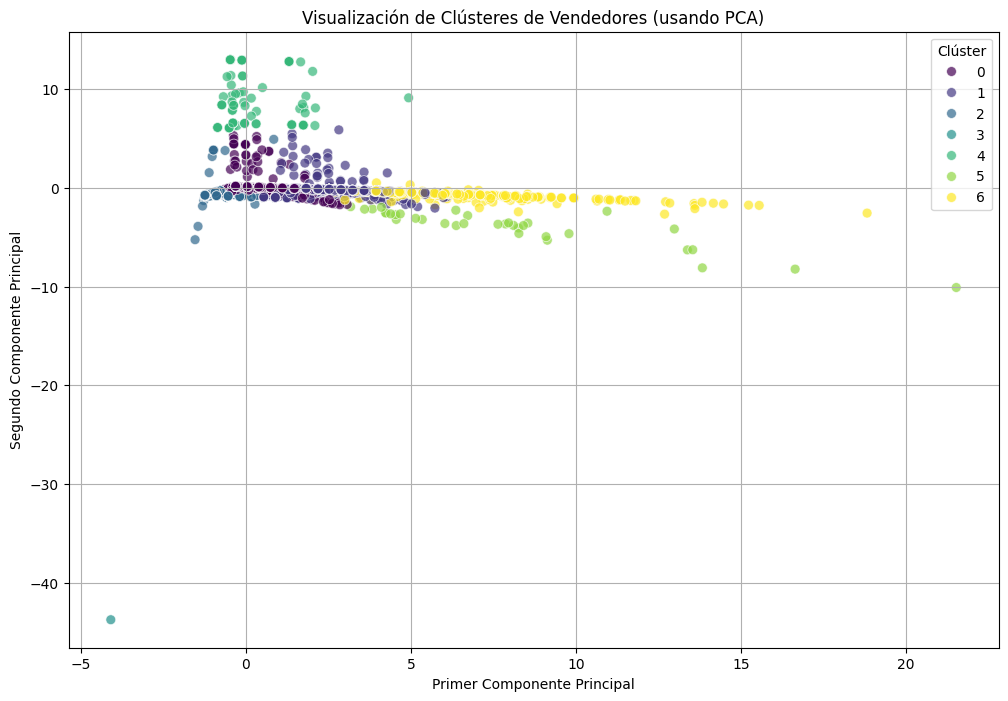

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=50, alpha=0.7)
plt.title('Visualización de Clústeres de Vendedores (usando PCA)')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Clúster')
plt.grid(True)
# plt.savefig('cluster_visualization_pca.png')
# print("Gráfica de visualización guardada como 'cluster_visualization_pca.png'")
plt.show()

## Exportar datos

In [13]:
df_sellers.to_csv('../data/02_processed/df_sellers_clustered.csv', index=False, encoding='latin-1')

## Estrategias para cada clúster

### Cluster 0: Vendedores Tradicionales

**Perfil**: Representan el 68.46% del total de vendedores. El grupo más grande y representativo. Son vendedores estándar o minoristas que manejan un inventario considerable pero no masivo. Sus precios son moderados y venden principalmente productos nuevos. Operan con una logística sencilla y no tienen una gran diversificación de categorías.

**Estrategias Comerciales**:

* Onboarding y Educación Continua: Ofrecerles webinars sobre cómo profesionalizar su negocio: "Potencia tus ventas", "Guía para tu primera campaña en Mercado Ads", "Ventajas de enviar tu inventario a Full".

* Incentivos para la Adopción de Herramientas: Crear campañas de "prueba gratuita" o créditos iniciales para que usen Mercado Ads o envíen sus primeras unidades a la bodega de Mercado Eníos Full. El objetivo es que escalen al siguiente nivel.

* Comunicación de Alertas: Notificarles proactivamente sobre cambios en la competencia de sus productos más vendidos o sobre nuevas tendencias en sus categorías para ayudarles a mantenerse competitivos.

### Cluster 1: Vendedores Mayoristas

**Perfil**: Son distribuidores que usan la plataforma como un canal. El dato de logistic_type_unique (2.06) es clave: combinan Mercado Envíos Colecta o Full para la alta rotación y Mercado Envíos Flex o logística propia para entregas locales o productos voluminosos.

**Estrategias Comerciales**:

* Soluciones Logísticas a Medida: Asignarles un asesor logístico que les ayude a optimizar su mix de envíos. Ofrecerles tarifas preferenciales en Mercado Envíos por volumen.

* API y Conectividad: Promocionar activamente el uso de su API para que estos vendedores integren sus propios sistemas de gestión de inventario (ERP/WMS) con la plataforma, evitando quiebres de stock.

### Cluster 2: Vendedores de Lujo

**Perfil**: Boutiques, joyerías, tiendas de tecnología de alta gama o vendedores de arte. Su inventario es bajo (stock_total: 23) pero su ticket promedio es el más alto. La confianza y la presentación son todo para ellos. Probablemente operen a través de una Tienda Oficial.

**Estrategias Comerciales**:

* Potenciar las Tiendas Oficiales: Ofrecerles herramientas de branding avanzadas para sus Tiendas Oficiales (banners personalizados, videos en publicaciones y layouts exclusivos) para que puedan replicar la experiencia de su marca de lujo.

* Protección de Marca: Darles acceso prioritario a programas de Brand Protection para denunciar y eliminar falsificaciones rápidamente, protegiendo su propiedad intelectual.

* Marketing Exclusivo: Crear segmentos de audiencia de "Compradores de Alto Valor" dentro de Mercado Ads para que estos vendedores puedan dirigir sus campañas de forma ultra-segmentada.

### Cluster 4: Vendedores Productos Reacondicionados

**Perfil**: Especialistas en el mercado de "segunda mano certificada". El pct_refurbished del 89% los define. Su principal desafío es generar confianza en el comprador.

**Estrategias Comerciales**:

* Crear un "Sello de Confianza Refurbished": Implementar un programa oficial de "Reacondicionado Certificado por Mercado Libre", donde la plataforma audite el proceso de estos vendedores y les otorgue un sello que aumente drásticamente la confianza del comprador.

* Políticas de Garantía Claras: Establecer una política de garantía estándar para productos reacondicionados en la plataforma (ej. 90 días por defecto) para homogeneizar la oferta y proteger al comprador.

### Cluster 5: Vendedores de Distribución Masiva

**Perfil**: Venden productos de muy bajo costo y altísima rotación. El stock_total de 434,718 es su seña de identidad. Su negocio no está en el margen por unidad, sino en la escala operativa.

**Estrategias Comerciales**:

* Soporte Técnico API Prioritario: Son los usuarios más intensivos de la API de Mercado Libre. Ofrecerles un canal de soporte técnico dedicado para resolver problemas de integración rápidamente.

* Inteligencia de Datos: Proveerles dashboards con análisis predictivo de demanda para que puedan planificar sus importaciones y niveles de stock en Full con meses de antelación.

### Cluster 6: Vendedores de Muchas Categorías

**Perfil**: Son los grandes almacenes de Mercado Libre. Su fortaleza es la diversidad (categorias_unicas: 11.88). Son expertos en identificar y explotar nichos de oportunidad rápidamente. Tienen un stock muy alto y operan a gran escala.

**Estrategias Comerciales**:

* Acceso a Reportes de Tendencias: Darles acceso beta a herramientas de "Mercado Libre Tendencias" más avanzadas, que muestren qué productos están creciendo en búsquedas pero tienen poca oferta, permitiéndoles encontrar su siguiente producto estrella.

* Flexibilidad en Mercado Shops: Ofrecerles plantillas y funcionalidades avanzadas en Mercado Shops para que puedan crear una experiencia de marca coherente a pesar de su catálogo diverso.